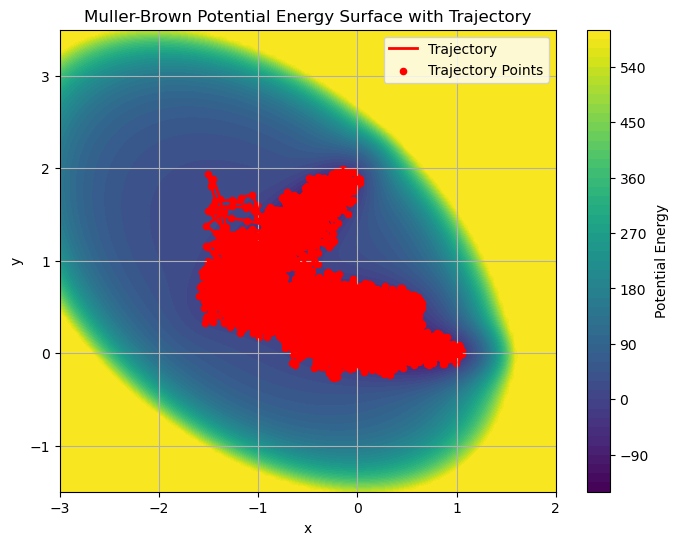

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Read the Muller-Brown data file
filename_pes = 'potential.dat'
with open(filename_pes, 'r') as f:
    lines = f.readlines()

# Parse the header to get the number of grid points
header = lines[0].strip()
nx, ny = map(int, header.split()[1:3])

# Initialize arrays for x, y, and z
x_pes = np.zeros(nx * ny)
y_pes = np.zeros(nx * ny)
z_pes = np.zeros(nx * ny)

# Read the data
data_lines = [line for line in lines[1:] if line.strip()]

for i, line in enumerate(data_lines):
    parts = line.split()
    x_pes[i] = float(parts[0])
    y_pes[i] = float(parts[1])
    z_pes[i] = float(parts[2])

# Reshape the data into a 2D grid
x_grid = x_pes.reshape((nx, ny))
y_grid = y_pes.reshape((nx, ny))
z_grid = z_pes.reshape((nx, ny))

# Read the trajectory file
filename_traj = 'colvar.out'
traj_data = np.loadtxt(filename_traj, skiprows=1)
x_traj = traj_data[:, 1]
y_traj = traj_data[:, 2]

# Create the contour plot
plt.figure(figsize=(8, 6))
contour = plt.contourf(x_grid, y_grid, z_grid, levels=50, cmap='viridis')
plt.colorbar(contour, label='Potential Energy')
plt.title('Muller-Brown Potential Energy Surface with Trajectory')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

# Plot the trajectory as a line with points
plt.plot(x_traj, y_traj, color='red', linewidth=2, label='Trajectory')
plt.scatter(x_traj, y_traj, color='red', s=20, label='Trajectory Points')

plt.legend()
plt.show()


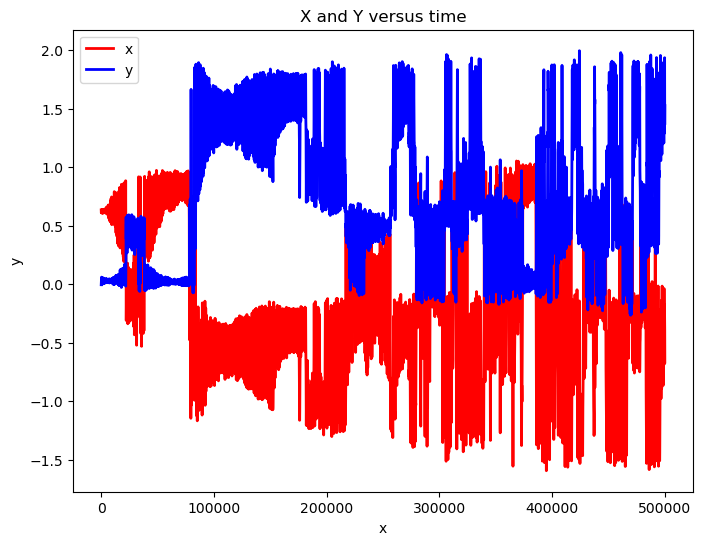

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Read the trajectory file
filename_traj = 'colvar.out'
traj_data = np.loadtxt(filename_traj, skiprows=1)
time = traj_data[:, 0]
x_traj = traj_data[:, 1]
y_traj = traj_data[:, 2]

# Create the contour plot
plt.figure(figsize=(8, 6))
plt.title('X and Y versus time')

# Plot the trajectory as a line with points
plt.plot(time, x_traj, color='red', linewidth=2, label='x')
plt.plot(time, y_traj, color='blue', linewidth=2, label='y')
plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()


In [64]:
!../../plumed/bin/plumed sum_hills --hills HILLS --min -3.0,-1.5 --max 2.0,3.5 --bin 30,30

PLUMED: PLUMED is starting
PLUMED: Version: 2.3.0 (git: Unknown) compiled on Sep 13 2025 at 15:49:15
PLUMED: Please cite this paper when using PLUMED [1]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Molecular dynamics engine: 
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 1
PLUMED: File suffix: 
PLUMED: Timestep: 0.000000
PLUMED: KbT has not been set by the MD engine
PLUMED: It should be set by hand where needed
PLUMED: Relevant bibliography:
PLUMED:   [1] Tribello, Bonomi, Branduardi, Camilloni, and Bussi, Comput. Phys. Commun. 185, 604 (2014)
PLUMED: Please read and cite where appropriate!
PLUMED: Finished setup
PLUMED: Action FAKE
PLUMED:   with label cv
PLUMED: WARNING for action FAKE with label cv : a description of component x has not been added to the manual. Components should be registered like keywords in registerKeywords as described in th

In [65]:
!head fes.dat

#! FIELDS cv.x cv.y file.free der_cv.x der_cv.y
#! SET min_cv.x -3.0
#! SET max_cv.x 2.0
#! SET nbins_cv.x  31
#! SET periodic_cv.x false
#! SET min_cv.y -1.5
#! SET max_cv.y 3.5
#! SET nbins_cv.y  31
#! SET periodic_cv.y false
   -3.000000000   -1.500000000   -0.000000000   -0.000000000   -0.000000000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


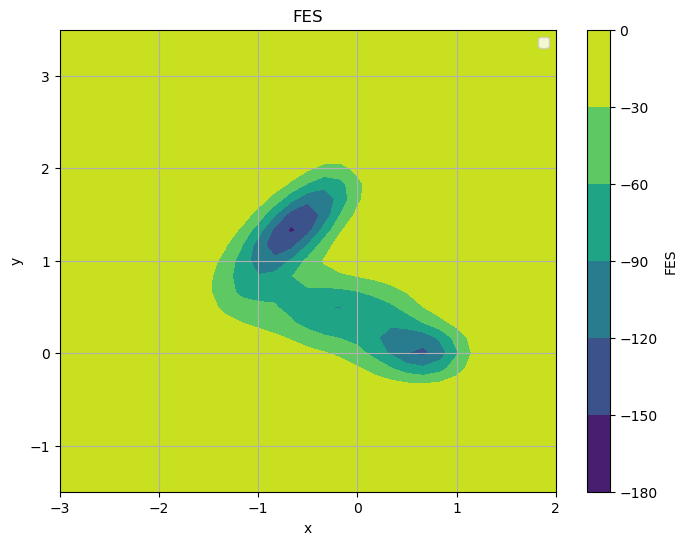

In [66]:
# Read the fes data file
filename_fes = 'fes.dat'
with open(filename_fes, 'r') as f:
    lines = f.readlines()

# Parse the header to get the number of grid points
xmin = float(lines[1].split()[3])
xmax = float(lines[2].split()[3])
ymin = float(lines[5].split()[3])
ymax = float(lines[6].split()[3])
nx = int(lines[3].split()[3])
ny = int(lines[7].split()[3])

# Initialize arrays for x, y, and z
x_fes = np.zeros(nx * ny)
y_fes = np.zeros(nx * ny)
z_fes = np.zeros(nx * ny)

# Read the data
data_lines = [line for line in lines[9:] if line.strip()]

for i, line in enumerate(data_lines):
    parts = line.split()
    x_fes[i] = float(parts[0])
    y_fes[i] = float(parts[1])
    z_fes[i] = float(parts[2])

# Reshape the data into a 2D grid
x_grid = x_fes.reshape((nx, ny))
y_grid = y_fes.reshape((nx, ny))
z_grid = z_fes.reshape((nx, ny))

# Create the contour plot
plt.figure(figsize=(8, 6))
contour = plt.contourf(x_grid, y_grid, z_grid, levels=5, cmap='viridis')
plt.colorbar(contour, label='FES')
plt.title('FES')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.legend()
plt.show()
